Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8784 - loss: 0.4259
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9623 - loss: 0.1274
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9747 - loss: 0.0816
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9822 - loss: 0.0598
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9862 - loss: 0.0441
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9710 - loss: 0.0980

Test accuracy: 0.9754999876022339
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


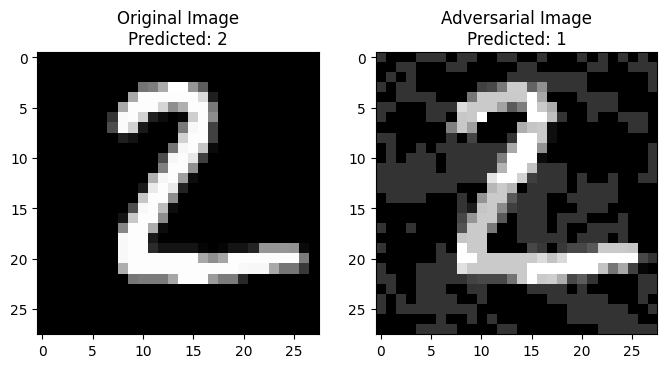

Original Prediction: 2
Adversarial Prediction: 1


In [2]:
# Step 1: Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

# Step 3: Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(train_images, train_labels, epochs=5)

# Step 6: Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc}')

# Step 7: Define the FGSM attack function
def create_adversarial_pattern(model, image, label):
    image = tf.convert_to_tensor(image)
    with tf.GradientTape() as tape:
        tape.watch(image)
        prediction = model(image)
        # Change to handle the shape mismatch
        loss = tf.keras.losses.sparse_categorical_crossentropy(tf.reshape(label, (1,)), prediction)

    # Get the gradients of the loss w.r.t. the input image
    gradient = tape.gradient(loss, image)

    # Get the sign of the gradients to create adversarial perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

# Step 8: Test the model with adversarial examples
# Select one test image and label
image = test_images[1]
label = test_labels[1]

# Reshape the image to add batch size dimension
image = tf.reshape(image, (1, 28, 28))

# Create adversarial perturbation
perturbation = create_adversarial_pattern(model, image, label)

# Apply the perturbation to the original image
epsilon = 0.2  # The strength of the attack
adversarial_image = image + epsilon * perturbation
adversarial_image = tf.clip_by_value(adversarial_image, 0, 1)

# Step 9: Predict the class of the original and adversarial images
original_pred = model.predict(image)
adversarial_pred = model.predict(adversarial_image)

# Step 10: Visualize the original and adversarial images
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.title(f'Original Image\nPredicted: {np.argmax(original_pred)}')
plt.imshow(image[0], cmap='gray')

# Adversarial image
plt.subplot(1, 2, 2)
plt.title(f'Adversarial Image\nPredicted: {np.argmax(adversarial_pred)}')
plt.imshow(adversarial_image[0], cmap='gray')

plt.show()
print(f'Original Prediction: {np.argmax(original_pred)}')
print(f'Adversarial Prediction: {np.argmax(adversarial_pred)}')
